In [3]:
#import libraries
import pydicom
import cv2
import os
import sys
import numpy
import pandas as pd
from matplotlib  import  cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random


# Root directory of the RCNN lib
ROOT_DIR = os.path.abspath("/Mask_RCNN-master/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the lib
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

# Import RCNN override class
from Mask_RCNN_model import *

ImportError: No module named cv2

In [10]:
Path_train_dicom_image = "all/stage_1_train_images"

Path_train_boxes_image = "all/stage_1_train_labels.csv"

path_additional_info = "all/stage_1_detailed_class_info.csv"

print(os.listdir("all"))

['GCP Credits Request Link - RSNA.txt', 'stage_1_detailed_class_info.csv', 'stage_1_sample_submission.csv', 'stage_1_test_images', 'stage_1_test_images.zip', 'stage_1_train_images', 'stage_1_train_images.zip', 'stage_1_train_labels.csv']


In [11]:
def dataset_load (image_dir, image_info_file):
    lstFilesDCM = []
    for dirName, subdirList, fileList in os.walk(image_dir):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))

    image_info = {pat: [] for pat in lstFilesDCM}
    for index, row in image_info_file.iterrows():
        pat = os.path.join(image_dir, row['patientId']+'.dcm')
        image_info[pat].append(row)
    return lstFilesDCM, image_info

In [12]:
boxes_labels = pd.read_csv(Path_train_boxes_image)
boxes_labels.info()
boxes_labels.head()   

additional_info = pd.read_csv(path_additional_info)
additional_info.info() 
additional_info.head()

image_file_list, image_info = dataset_load(Path_train_dicom_image, boxes_labels )

ORIG_SIZE = 1024

dataset_train = DetectorDataset(image_file_list, image_info, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28989 entries, 0 to 28988
Data columns (total 6 columns):
patientId    28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28989 entries, 0 to 28988
Data columns (total 2 columns):
patientId    28989 non-null object
class        28989 non-null object
dtypes: object(2)
memory usage: 453.0+ KB


(1024, 1024, 3)
all/stage_1_train_images\bf3ef845-34ab-4b80-81e7-ac7a3b23485a.dcm
[1]


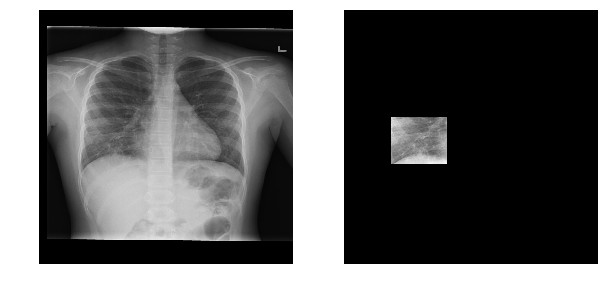

In [13]:
class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)